In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("paper")
sns.set_color_codes("deep")

In [2]:
# Load the dataset

df = pd.read_csv("/home/inventor/Datasets/Titanic/titanic/tested.csv")

In [3]:
# Sample of dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Shape of dataset
df.shape

(418, 12)

In [5]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Description about dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
def value_counts(df):

    for feature in df.columns:

        print(f"\n****************************")
        print(f"{feature} value counts \n")
        print(df[feature].value_counts())
        print(f"\n*****************************")

In [8]:
value_counts(df)


****************************
PassengerId value counts 

PassengerId
1309    1
892     1
1293    1
1292    1
1291    1
       ..
898     1
897     1
896     1
895     1
894     1
Name: count, Length: 418, dtype: int64

*****************************

****************************
Survived value counts 

Survived
0    266
1    152
Name: count, dtype: int64

*****************************

****************************
Pclass value counts 

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

*****************************

****************************
Name value counts 

Name
Peter, Master. Michael J                        1
Kelly, Mr. James                                1
Gale, Mr. Harry                                 1
Bonnell, Miss. Caroline                         1
Conlon, Mr. Thomas Henry                        1
                                               ..
Connolly, Miss. Kate                            1
Svensson, Mr. Johan Cervin                      1
Hirvonen, Mrs. 

Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
44.0     1
5.0      1
51.0     1
3.0      1
38.5     1
Name: count, Length: 79, dtype: int64

*****************************

****************************
SibSp value counts 

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

*****************************

****************************
Parch value counts 

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

*****************************

****************************
Ticket value counts 

Ticket
PC 17608              5
CA. 2343              4
113503                4
347077                3
SOTON/O.Q. 3101315    3
                     ..
330972                1
7538                  1
3101298               1
315154                1
240276                1
Name: count, Length: 363, dtype: int64

*****************************

****************************
Fare value counts 



In [9]:
# Handle the Missing Values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [12]:
# Remove Useless Features
df = df.drop(columns=["PassengerId", "Ticket", "Cabin", "Name"], axis=1)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [14]:
# Replace the datatype 
df["Age"] = df["Age"].astype("int")
df["SibSp"] = df["SibSp"].astype("category")
df["Parch"] = df["Parch"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  418 non-null    int64   
 1   Pclass    418 non-null    category
 2   Sex       418 non-null    object  
 3   Age       418 non-null    int64   
 4   SibSp     418 non-null    category
 5   Parch     418 non-null    category
 6   Fare      418 non-null    float64 
 7   Embarked  418 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 18.5+ KB


In [16]:
df["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

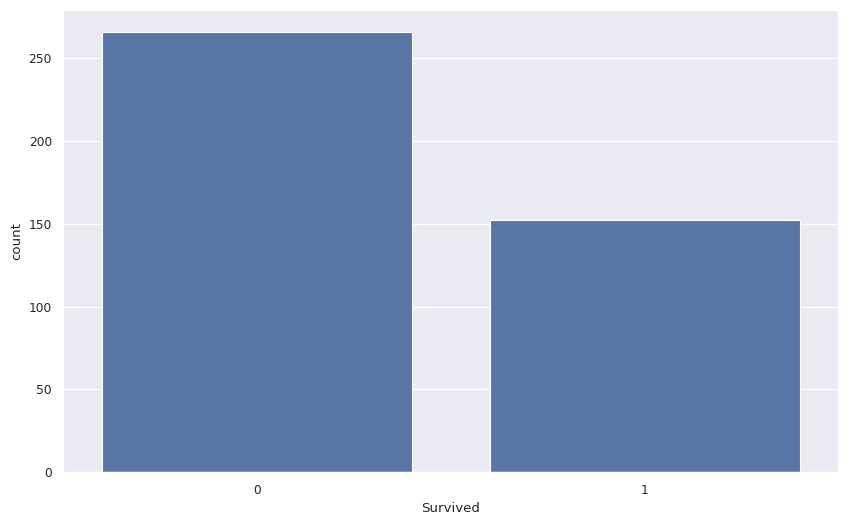

In [17]:
# Visulize the data
# Distribution of target feature
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Survived")
plt.show()

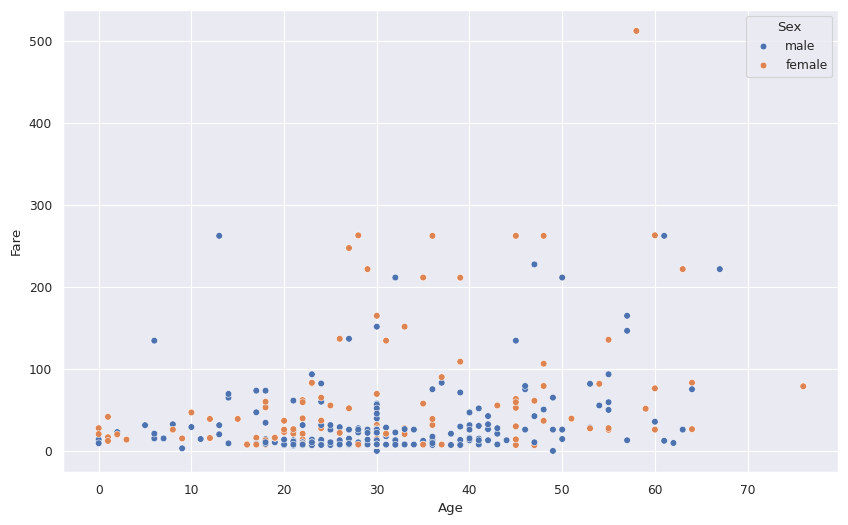

In [18]:
# Survived vs Gender
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="Fare", hue="Sex")
plt.show()

<Figure size 1000x600 with 0 Axes>

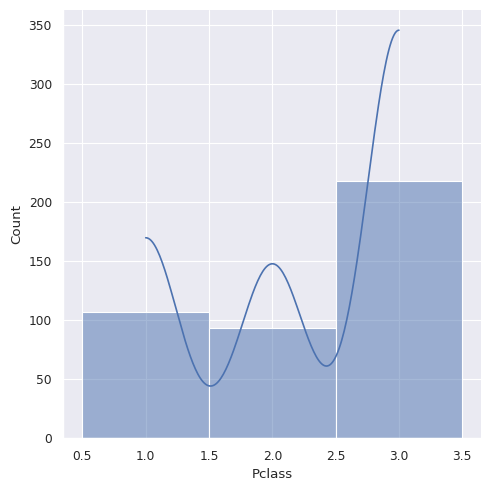

In [19]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x="Pclass", kde=True)
plt.show()

<Figure size 1000x600 with 0 Axes>

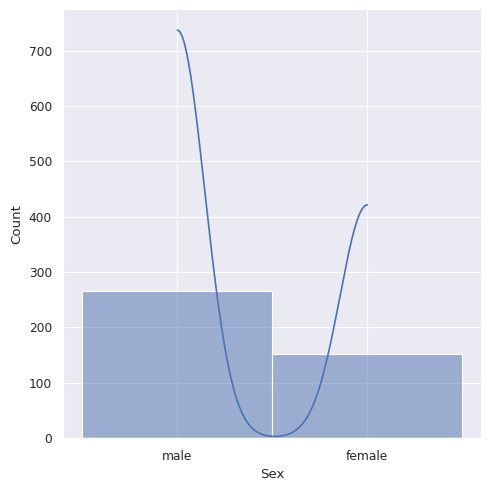

In [20]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x="Sex", kde=True)
plt.show()

<Figure size 1000x600 with 0 Axes>

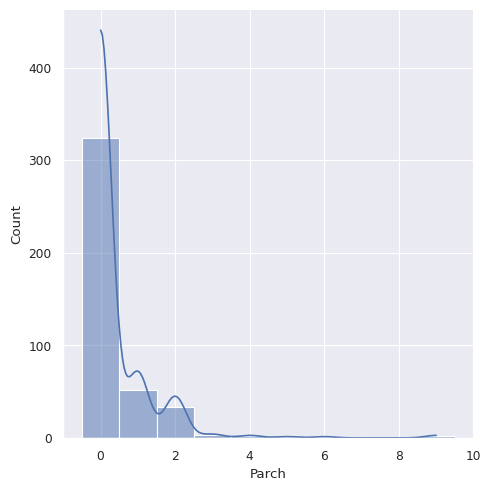

In [21]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x="Parch", kde=True)
plt.show()

<Figure size 1000x600 with 0 Axes>

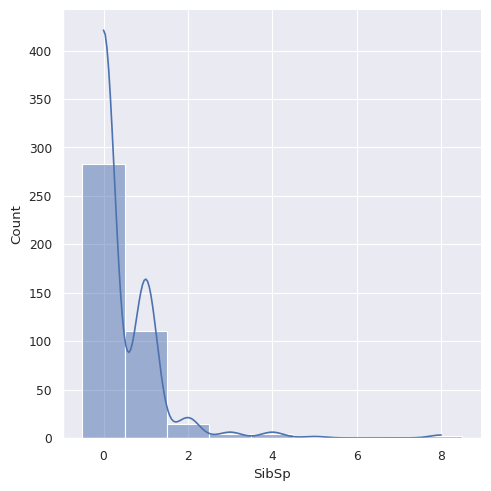

In [22]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x="SibSp", kde=True)
plt.show()

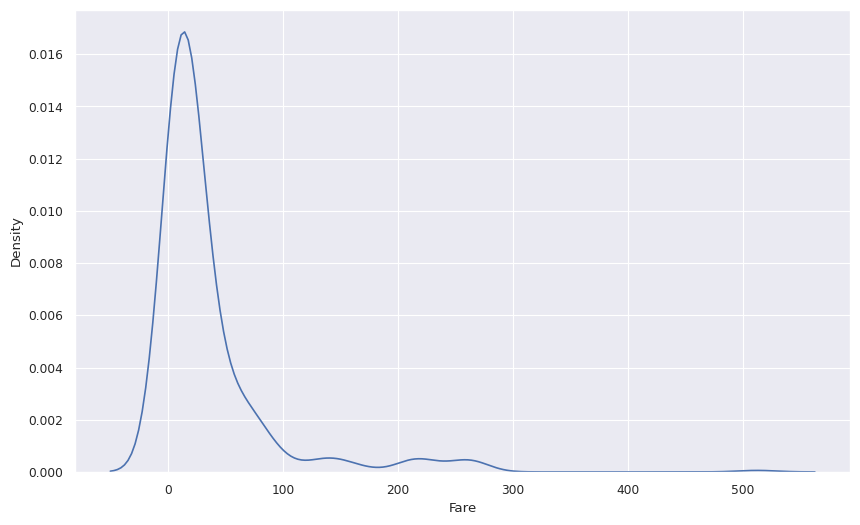

In [23]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Fare")
plt.show()

<Figure size 1000x600 with 0 Axes>

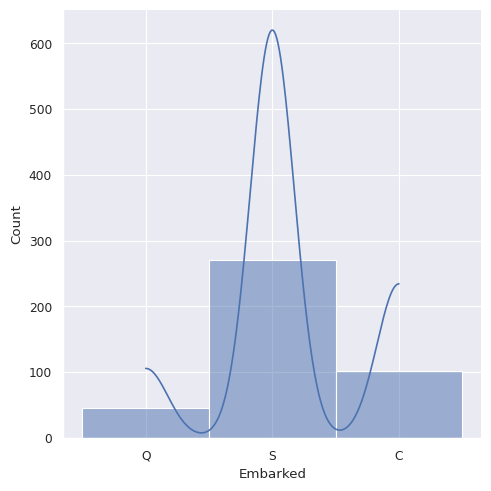

In [24]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x="Embarked", kde=True)
plt.show()

<Figure size 1000x600 with 0 Axes>

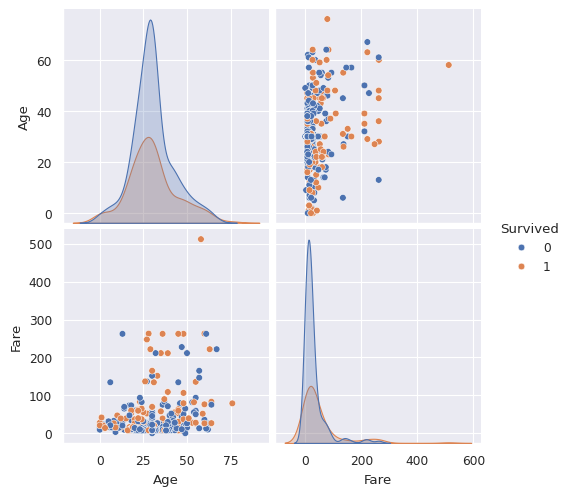

In [25]:
plt.figure(figsize=(10, 6))
sns.pairplot(data=df, hue="Survived")
plt.show()

<Figure size 1000x600 with 0 Axes>

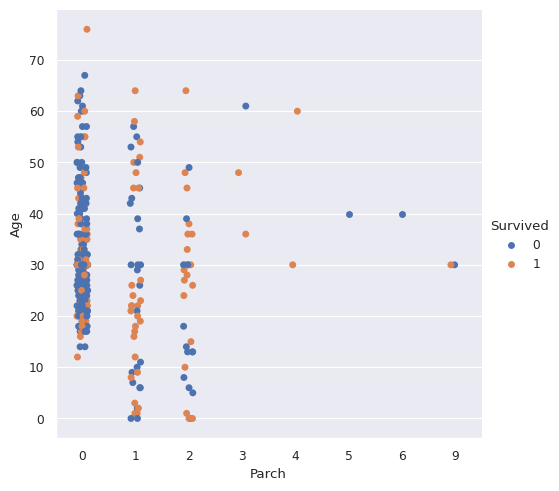

In [26]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Parch", y="Age", hue="Survived")
plt.show()

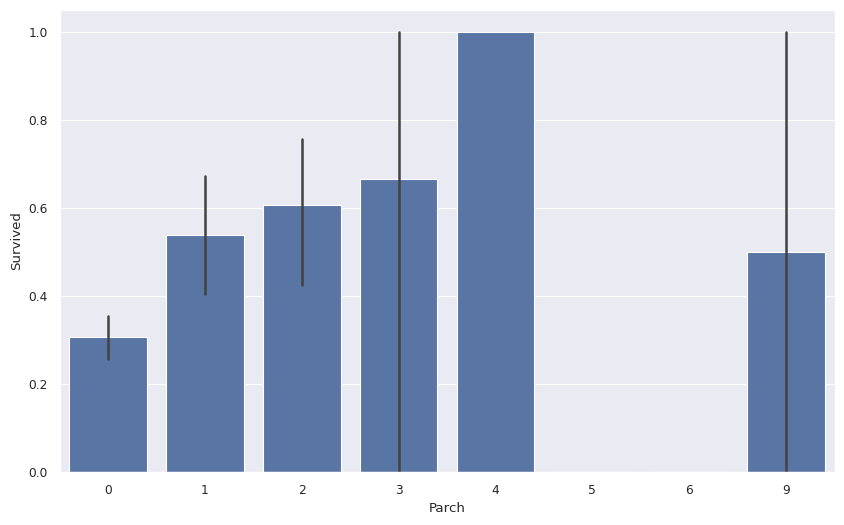

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Parch", y="Survived")
plt.show()

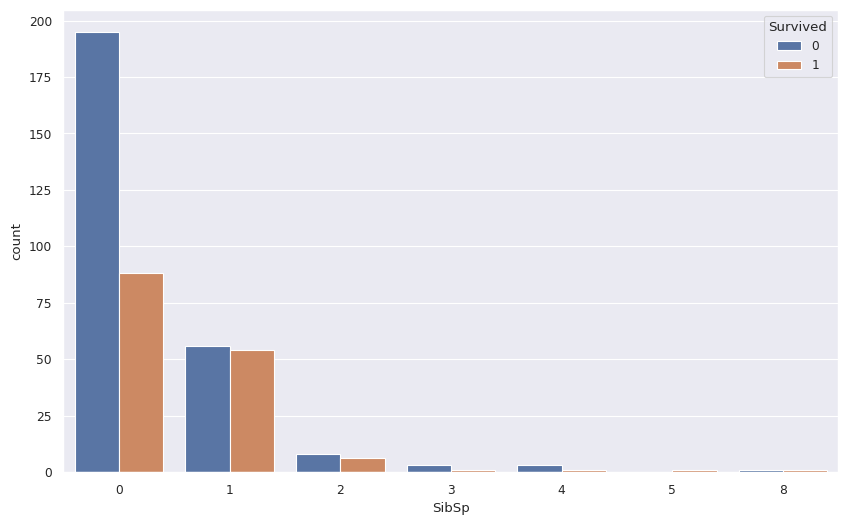

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="SibSp", hue="Survived")
plt.show()

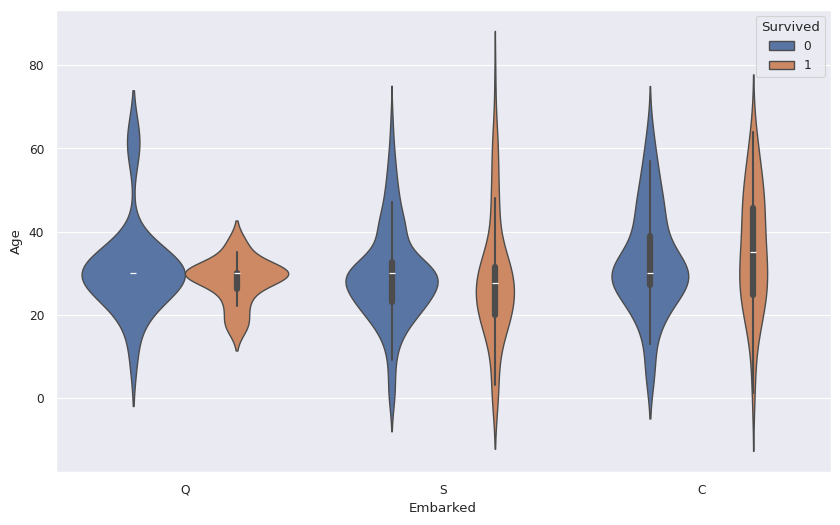

In [29]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Embarked", y="Age", hue="Survived")
plt.show()

<Figure size 1000x600 with 0 Axes>

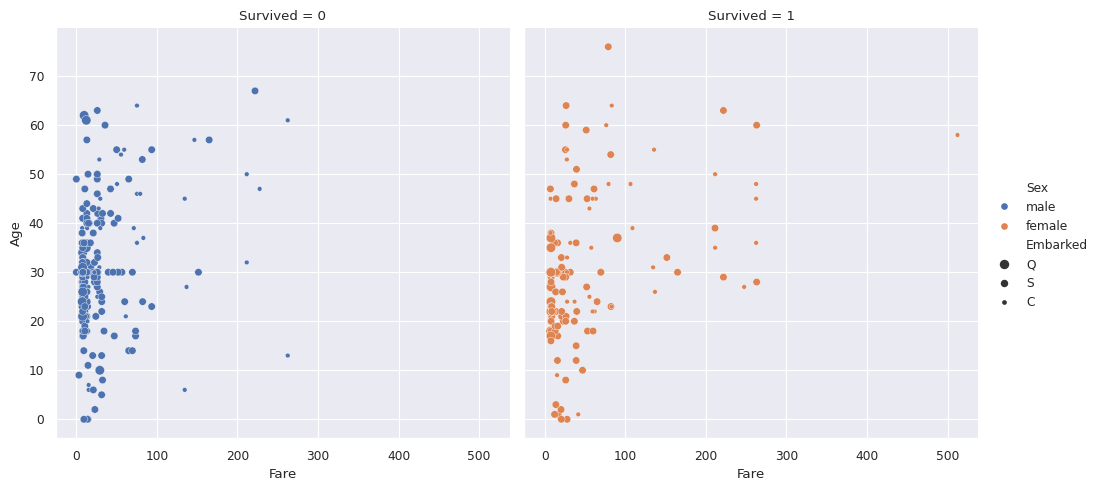

In [30]:
plt.figure(figsize=(10, 6))
sns.relplot(data=df, x="Fare", y="Age", hue="Sex", col="Survived", marker="o", size="Embarked")

In [31]:
num_features = [feature for feature in df.columns if df[feature].dtype in ["int", "float"]]
cat_features = [feature for feature in df.columns if df[feature].dtype not in ["int", "float"]]

In [32]:
num_features, cat_features

(['Survived', 'Age', 'Fare'], ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore", dtype=int)

encoded_df = encoder_.fit_transform(df[cat_features])

encoded_df = pd.DataFrame(encoded_df, columns=encoder_.get_feature_names_out(cat_features))

encoded_df = pd.concat([df, encoded_df], axis=1)

encoded_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3,...,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S
0,0,3,male,34,0,0,7.8292,Q,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,3,female,47,1,0,7.0000,S,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,2,male,62,0,0,9.6875,Q,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,3,male,27,0,0,8.6625,S,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,3,female,22,1,1,12.2875,S,0,1,...,0,1,0,0,0,0,0,0,0,1


In [34]:
df = df.drop(columns=["Pclass", "Sex", "SibSp", "Parch", "Embarked"], axis=1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Survived", axis=1), df["Survived"], test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler_ = StandardScaler()

X_train = scaler_.fit_transform(X_train)
X_test = scaler_.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression

logistic_ = LogisticRegression()

logistic_.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred_logistic = logistic_.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

acc_score_logistic = accuracy_score(y_test, y_pred_logistic)
f1_score_logistic = f1_score(y_test, y_pred_logistic, zero_division=0)
cr_logistic = classification_report(y_test, y_pred_logistic, zero_division=0)

print(f"Accuracy Score Logistic: {acc_score_logistic:.2f}%")
print(f"F1 Score Logistic: {f1_score_logistic:.2f}")
print(f"Classification Report : \n{cr_logistic}")

Accuracy Score Logistic: 0.61%
F1 Score Logistic: 0.15
Classification Report : 
              precision    recall  f1-score   support

           0       0.61      0.96      0.74        50
           1       0.60      0.09      0.15        34

    accuracy                           0.61        84
   macro avg       0.60      0.52      0.45        84
weighted avg       0.60      0.61      0.51        84



In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kf = StratifiedKFold(n_splits=10)

cv_score_logistics = cross_val_score(logistic_, X_train, y_train, cv=kf, scoring="accuracy")

<Axes: >

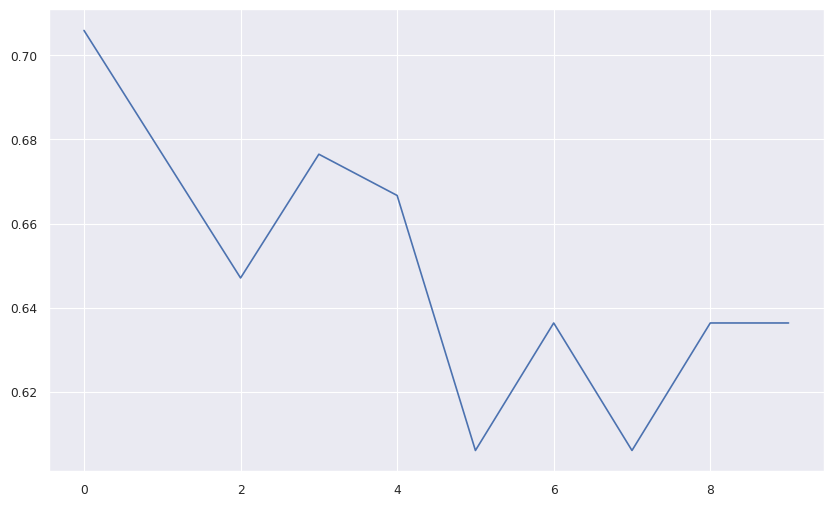

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(cv_score_logistics)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
models = {
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifer":RandomForestClassifier(),
    "SVC":SVC(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}

acc_score_models = []
cv_score_models = []

for model_name, model in models.items():

    print(f"Evaluating Model: {model_name}")

    # Performing Cross Validation

    cv_score = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
    cv_score_models.append(cv_score)

    print(f"CV Score: {cv_score}")
    print(f"Mean CV Score: {cv_score.mean()}")

    # Train the model

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Evaluate the test set
    acc_score = accuracy_score(y_test, y_pred)
    acc_score_models.append(acc_score)
    print(f"Accuracy_score: {acc_score:.2f}%")
    print(f"Classification Report: {classification_report(y_test, y_pred)}")



Evaluating Model: DecisionTreeClassifier
CV Score: [0.61764706 0.58823529 0.55882353 0.55882353 0.72727273 0.66666667
 0.66666667 0.60606061 0.51515152 0.57575758]
Mean CV Score: 0.6081105169340464
Accuracy_score: 0.55%
Classification Report:               precision    recall  f1-score   support

           0       0.60      0.70      0.65        50
           1       0.42      0.32      0.37        34

    accuracy                           0.55        84
   macro avg       0.51      0.51      0.51        84
weighted avg       0.53      0.55      0.53        84

Evaluating Model: RandomForestClassifer


CV Score: [0.61764706 0.61764706 0.52941176 0.55882353 0.75757576 0.57575758
 0.63636364 0.63636364 0.39393939 0.51515152]
Mean CV Score: 0.583868092691622
Accuracy_score: 0.62%
Classification Report:               precision    recall  f1-score   support

           0       0.65      0.80      0.71        50
           1       0.55      0.35      0.43        34

    accuracy                           0.62        84
   macro avg       0.60      0.58      0.57        84
weighted avg       0.60      0.62      0.60        84

Evaluating Model: SVC
CV Score: [0.64705882 0.70588235 0.61764706 0.67647059 0.66666667 0.63636364
 0.63636364 0.57575758 0.63636364 0.57575758]
Mean CV Score: 0.6374331550802139
Accuracy_score: 0.62%
Classification Report:               precision    recall  f1-score   support

           0       0.61      0.98      0.75        50
           1       0.75      0.09      0.16        34

    accuracy                           0.62        84
   macro avg       0.68      0

In [45]:
acc_score_models

[0.5476190476190477,
 0.6190476190476191,
 0.6190476190476191,
 0.5714285714285714]

In [46]:
acc_score_models.append(acc_score_logistic)

In [47]:
cv_score_models

[array([0.61764706, 0.58823529, 0.55882353, 0.55882353, 0.72727273,
        0.66666667, 0.66666667, 0.60606061, 0.51515152, 0.57575758]),
 array([0.61764706, 0.61764706, 0.52941176, 0.55882353, 0.75757576,
        0.57575758, 0.63636364, 0.63636364, 0.39393939, 0.51515152]),
 array([0.64705882, 0.70588235, 0.61764706, 0.67647059, 0.66666667,
        0.63636364, 0.63636364, 0.57575758, 0.63636364, 0.57575758]),
 array([0.61764706, 0.58823529, 0.58823529, 0.70588235, 0.78787879,
        0.63636364, 0.63636364, 0.63636364, 0.51515152, 0.54545455])]

In [48]:
cv_score_models_dic = {
    "DecisionTreeClassifier":cv_score_models[0],
    "RandomForestClassifier":cv_score_models[1],
    "SVC":cv_score_models[2],
    "GradientBoostingClassifier":cv_score_models[3],
    "LogisticRegression":cv_score_logistics
}

In [49]:
cv_score_models

[array([0.61764706, 0.58823529, 0.55882353, 0.55882353, 0.72727273,
        0.66666667, 0.66666667, 0.60606061, 0.51515152, 0.57575758]),
 array([0.61764706, 0.61764706, 0.52941176, 0.55882353, 0.75757576,
        0.57575758, 0.63636364, 0.63636364, 0.39393939, 0.51515152]),
 array([0.64705882, 0.70588235, 0.61764706, 0.67647059, 0.66666667,
        0.63636364, 0.63636364, 0.57575758, 0.63636364, 0.57575758]),
 array([0.61764706, 0.58823529, 0.58823529, 0.70588235, 0.78787879,
        0.63636364, 0.63636364, 0.63636364, 0.51515152, 0.54545455])]

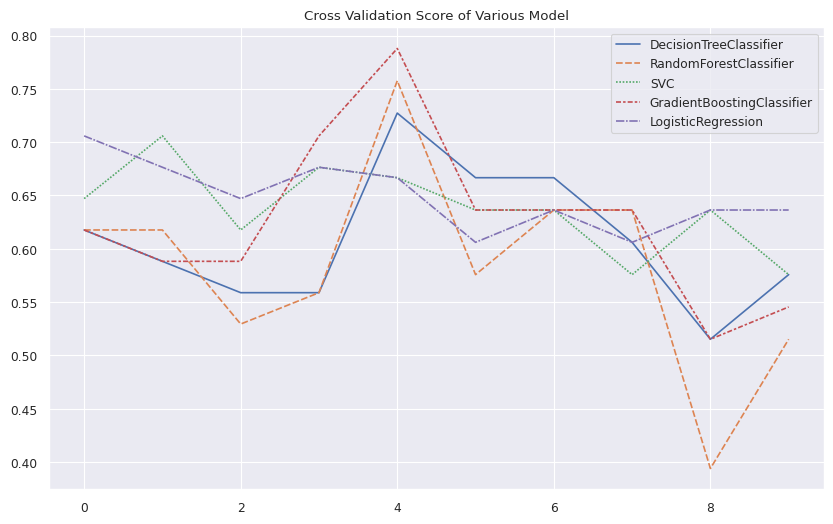

In [50]:
plt.figure(figsize=(10,6))
sns.lineplot(cv_score_models_dic)
plt.title("Cross Validation Score of Various Model")
plt.show()

In [51]:
acc_scores_dic = {
    "DecisionTreeClassifier":acc_score_models[0],
    "RandomForestClassifier":acc_score_models[1],
    "SVC":acc_score_models[2],
    "GradientBoostingClassifier":acc_score_models[3],
    "LogisticRegression":acc_score_models[4]
}

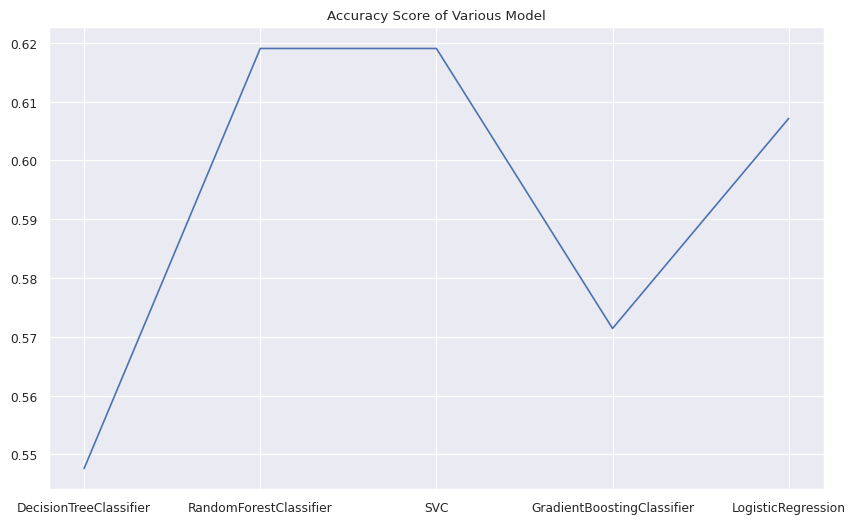

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(acc_scores_dic)
plt.title("Accuracy Score of Various Model")
plt.show()